###### 겨리 - 2021/01/13
### **행렬식(Determinant)**
#### 1. 라이프니츠 공식
#### 2. 여인수 전개(라플라스 전개)
#### 3. 행렬식의 성질과 가우스 소거법 이용한 행렬식의 도출(기본행연산)

##### 코드 설명
###### 라이프니츠 공식(https://gyeo-ri.com/59)
###### 여인수 전개(https://gyeo-ri.tistory.com/)
###### 행렬식의 성질과 가우스 소거법 이용한 행렬식의 도출(https://gyeo-ri.tistory.com/)
##### 
##### *모든 함수는 입력되는 행렬이 정방행렬임을 가정
##### * 0행이 한 줄이라도 있으면 Det(A) = 0이며 비가역행렬이다.

In [3]:
import random
import numpy as np

# 
### 1.라이프니츠 공식을 이용한 행렬식의 정의
##### 치환(순열)을 사용한 정의

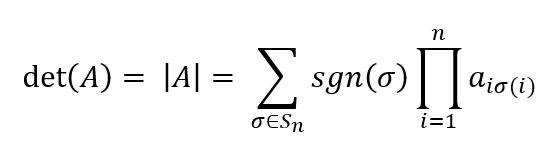

#### 치환(Permutation = 순열)
##### 원소들의 순서를 바꾸어 재배열하는 것

In [4]:
#랜덤 행렬 생성(1~20 사이의 정수)
def random_matrix(rows,cols, max_no=10):
    row_list=[]
    for r in range(rows):
        col_list=[]
        for c in range(cols):
            col_list.append(float(random.randint(0,max_no))) #float형으로 변환함
        row_list.append(col_list)
        
    return np.array(row_list) #넘파이 배열 형태로 변환

A=random_matrix(2,2)

In [5]:
def permutation(array, k):
    order = [] #순서쌍을 담을 공간
    n = len(array)
    
    if k == 1:
        for element in array: #원소가 최종적으로 하나만 남는 경우
            order.append([element])

    elif k > 1:
        for i in range(n):
            A = array.copy()
            element = A.pop(i)


            for sub in permutation(A,k-1): #재귀함수의 결과를 순차적으로 추출
                #입력된 변수의 결과를 sub에 순차적으로 출력하나, 도중에 하위 재귀를 만났을때는 하위재귀부터 처리함(if k==1이 아닌 경우)
                order.append([element]+sub)    
    return  order

In [6]:
def determinant(matrix):
    #행렬식 추출하기
    dim = len(matrix)

    det = 0 

    for sigma_i in  permutation(list(range(dim)),dim): #순열 가짓수만큼 시행

        sgn_sigma, fact, cnt = 1, 1,0 #sgn_sigma : 홀치환/짝치환 결과, fact : 각 원소들의 계승, cnt :각 순열의 치환 횟수을 집계
        for ai in range(dim): #1열부터 sigma 함수 적용
            cnt += sum([sigma_i[ai] > sigma_i[num] for num in range(ai, dim)]) #각 원소의 치환 횟수를 집계
            fact *= A[ai][sigma_i[ai]] #원소끼리 곱셈(계승)

        sgn_sigma *= (-1)**cnt #홀치환이면 음수, 짝치환이면 양수 부여


        det += fact *sgn_sigma #행렬식 계산
        
    return det

In [7]:
A=random_matrix(3,3)
print(A)

[[ 4. 10.  0.]
 [ 6.  8.  7.]
 [ 6.  1. 10.]]


In [8]:
determinant(A)

112.0

#### 행렬식을 같이 추출하는 함수

In [16]:
def determinant_calculation(matrix):
    #행렬식 추출하기
    dim = len(matrix)
    det = 0 
    temp_list_2 = []
    
    
    print("Matrix : \n", matrix, "\n")
    for sigma_i in  permutation(list(range(dim)),dim): #순열 가짓수만큼 시행
        temp_list = []
        sgn_sigma, fact, cnt = 1, 1,0 #sgn_sigma : 홀치환/짝치환 결과, fact : 각 원소들의 계승, cnt :각 순열의 치환 횟수을 집계
        for ai in range(dim): #1열부터 sigma 함수 적용
            cnt += sum([sigma_i[ai] > sigma_i[num] for num in range(ai, dim)]) #각 원소의 치환 횟수를 집계
            fact *= matrix[ai][sigma_i[ai]] #원소끼리 곱셈(계승)
            
            temp_list.append(matrix[ai][sigma_i[ai]])
            
        sgn_sigma *= (-1)**cnt #홀치환이면 음수, 짝치환이면 양수 부여
        temp_list.append(sgn_sigma)
        
        temp_list_2.append(temp_list)

        det += fact *sgn_sigma #행렬식 계산
    
    print("Calculation = ", end = "")
    for row in temp_list_2[:-1]:
        print("("+str(row[-1])+") * (" , end="")
        [print(int(num), end = " * ") for num in row[:-2]]
        print(int(row[-2]), end = "")
        print(")", end = " + ")
    
    last_row = temp_list_2[-1]
    print("("+str(last_row[-1])+") * (" , end="")
    [print(int(num), end = " * ") for num in last_row[:-2]]
    print(int(last_row[-2]), end="")
    print(")")
    print("Det(B) :",det)
    
    return 

In [30]:
B=random_matrix(3,3)

In [31]:
determinant_calculation(B)

Matrix : 
 [[0. 9. 3.]
 [8. 8. 0.]
 [9. 2. 5.]] 

Calculation = (1) * (0 * 8 * 5) + (-1) * (0 * 0 * 2) + (-1) * (9 * 8 * 5) + (1) * (9 * 0 * 9) + (1) * (3 * 8 * 2) + (-1) * (3 * 8 * 9)
Det(B) : -528.0


In [32]:
np.linalg.det(B)

-528.0

# 
### 2.여인수 전개(cofactor expansion)
##### 여인수(cofactor) : 특정 원소가 속한 행/열을 제외한 부분행렬의 행렬식(소행렬식)에 (행/열의 위치에 따라)부호를 부여한 것
##### 라이프니츠 공식에 따라 전개된 행렬식을 원소와 소행렬식(Minor), 부호함수로 재구성하여 계산을 용이하게 함

In [116]:
A=random_matrix(4,4)

In [86]:
np.linalg.det(A)

2710.000000000001

In [87]:
A

array([[ 2.,  0.,  6.,  7.],
       [ 4.,  8.,  2.,  5.],
       [10.,  1.,  9.,  2.],
       [ 3.,  5., 10.,  8.]])

In [88]:
def det_cofactor(matrix): #1행전개로 구현
    
    det = 0 #결과를 담을 객체
    dim = len(matrix)
    
    if dim == 2: #2차 행렬일 때는 ad-bc 수행
        
        det = matrix[0][0]*matrix[1][1] - matrix[1][0]*matrix[0][1] 
        return det
    
    else : 
        
        for col in range(dim):
            #원소 a 추출
            a = matrix[0][col]

            #소행렬식 M 추출
            partial = np.delete(matrix,0,axis=0) #1행전개
            partial = np.delete(partial,col,axis=1)
            
            M = det_cofactor(partial) #재귀함수

            sgn = (-1)**(col)
            # 부호(실제 파이썬 인덱스는 0부터 시작하므로, 1행과 k열의 숫자 합은 col 변수와 동일한 홀/짝의 성질을 가짐)
            det += a*sgn*M

    return det

In [89]:
det_cofactor(A)

2710.0

# 
### 3.가우스 소거법을 이용한 행렬식 계산
#### 기본행 연산과 그 결과로 도출된 행사다리꼴의 행렬식의 성질을 이용
#### (1) 기본행 연산 :
##### - 행의 상수배 시 행렬식에도 상수배가 적용
##### - 행교환 연산 시 호환(교환) 횟수가 1이므로 행렬식은 -|A|가 됨
##### - 행의 (상수배 후) 덧셈 연산 시 행렬식에는 변화가 없음
#### (2) 가우스 소거법 : 행렬을 기본행 연산을 통해 선행원소가 1인 행사다리꼴(=상삼각행렬)로 변환
##### - 기본행연산의 발생을 기록
##### - 가우스 소거법의 결과로 도출된 행렬의 행렬식(행사다리꼴의 행렬식)은 1이므로, 기본행연산에 따른 기존 행렬식의 변화가 

In [187]:
def det_gauss(matrix_input):
    matrix=matrix_input.copy() #기존 배열을 보존하기 위해
    dim = len(matrix)
    det = 1 #행사다리꼴의 행렬식은 1

    row_count = 0
    for col_count in range(dim): #선행 원소 아래의 값(열 하단)이 0이 될때까지 반복 수행
        comp_num = np.inf # 비교할 숫자의 기본값을 무한대로 지정(보다 작은 수)
        
        
        # 첫 열이 1이거나, 0이 아닌 수 중 가장 작은 행을 추출
        for i in range(row_count,dim):
            if (0 < abs(matrix[i][col_count])) & (abs(matrix[i][col_count]) < abs(comp_num)) : 
                comp_num = matrix[i][col_count] #절댓값이 가장 작은 첫 행의 값

                first_row = i #첫 행으로 사용할 행
                if matrix[i][0] == 1: #1을 찾은 경우 
                    break
                    
            

        
        matrix[first_row]=matrix[first_row]/comp_num  #첫 행의 첫 열을 1로 변환
        #print(round(comp_num,3), "만큼 상수배 적용")
        det *= comp_num #상수배 만큼 적용
        
        if first_row != row_count:
            det *= -1
            #print(first_row+1,"행이", row_count+1,"행과 교환")
            matrix[first_row], matrix[row_count] = matrix[row_count].copy(), matrix[first_row].copy() #대상 인덱스와 첫 행을 교환
        
        #first_row가 첫 행을 가리키지 않으면 첫 행과 다른 행이 1회 행교환되었으므로 부호가 음수가 됨

            
        #상수배 후 덧셈연산(행렬식에 영향을 주지 않음)
        for j in range(row_count+1,dim):
            if matrix[j][col_count] != 0:
                con_no = matrix[j][col_count]
                matrix[j] = matrix[j] - con_no * matrix[row_count]
                
        row_count += 1

        
    return det
    

In [182]:
A

array([[ 8.,  2.,  5.,  6.],
       [ 6.,  8., 10.,  1.],
       [ 1.,  6., 10.,  4.],
       [ 2.,  3., 10.,  1.]])

In [183]:
det_gauss(A)

1.0 만큼 상수배 적용
3 행이 1 행과 교환
-9.0 만큼 상수배 적용
4 행이 2 행과 교환
-18.889 만큼 상수배 적용
4 행이 3 행과 교환
11.324 만큼 상수배 적용


-1924.9999999999998

In [184]:
#### 구현한 세개의 함수와 넘파이 메소드의 결과 비교
##### 소수점 연산을 하는 일부 함수(넘파이 모듈 포함)의 경우 정확한 값을 반환하지 못할 때가 있음
##### 행렬의 모든 원소가 정수일 경우 행렬식은 항상 정수(라이프니츠 공식에서 나눗셈을 하지 않음)
##### 정수가 아닌 실수를 포함하는 행렬일 경우 round를 적절히 조정할 필요가 있음

In [188]:
det_0=round(determinant(A))
det_1=round(det_cofactor(A))
det_2=round(det_gauss(A))
det_3=round(np.linalg.det(A))

In [189]:
print("라이프니츠 공식 :",det_0)
print("여인수 전개 :",det_1)
print("가우스 소거법 :",det_2)
print("Numpy 메소드 :",det_3)

라이프니츠 공식 : -1925.0
여인수 전개 : -1925.0
가우스 소거법 : -1925.0
Numpy 메소드 : -1925.0


#### 모두 동일한 값을 반환함을 확인

In [207]:
import time

In [230]:
A

array([[ 0.,  3.,  2.,  6.,  5.,  1.,  7.,  3.,  0.,  0.],
       [10.,  1.,  4.,  2., 10.,  5.,  3.,  1.,  2.,  6.],
       [ 1.,  6.,  2.,  5.,  5.,  2., 10.,  6.,  6.,  7.],
       [ 4.,  0.,  3.,  9.,  9.,  2.,  0.,  7.,  9.,  6.],
       [ 3.,  5.,  3.,  2.,  1.,  9.,  5.,  3.,  5.,  9.],
       [ 1.,  6.,  1.,  8.,  5.,  5.,  1.,  9.,  3., 10.],
       [ 0.,  8., 10.,  6.,  2.,  1.,  6.,  5.,  8.,  7.],
       [ 8.,  1.,  4., 10.,  7.,  7.,  3.,  6.,  2.,  9.],
       [ 9.,  3.,  9.,  1.,  3.,  5.,  7.,  8.,  8.,  2.],
       [ 1.,  9.,  7.,  6.,  2.,  2.,  1.,  6.,  0.,  7.]])

In [221]:
A=random_matrix(10,10)

In [231]:
a=time.time()
det_0=round(determinant(A))
b=time.time()
print("라이프니츠 공식 :", str(round(b-a,10))+"s")
a=time.time()
det_1=round(det_cofactor(A))
b=time.time()
print("여인수 전개 :", str(round(b-a,10))+"s")
a=time.time()
det_2=round(det_gauss(A))
b=time.time()
print("가우스 소거법 :", str(round(b-a,10))+"s")
a=time.time()
det_3=round(np.linalg.det(A))
b=time.time()
print("Numpy 메소드 :", str(round(b-a,10))+"s")

라이프니츠 공식 : 65.2468936443s
여인수 전개 : 37.1418597698s
가우스 소거법 : 0.0005879402s
Numpy 메소드 : 7.79629e-05s


In [229]:
det_0==det_1==det_2==det_3

True

In [234]:
round(7.79629e-05,4)

0.0001